# Initial Model #2 Russel
- Reading in data
- Performing EDA
- Dealing with missing
- Feature Select
- Inital Model prediction
- Train_Test New features and Stacking models and performing CV

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in data
df_train = pd.read_csv('Train Updated Attribs.csv')
df_test = pd.read_csv('test.csv')
#Save Id of each column to a different df
train_id = df_train['Id']
test_id = df_test['Id']
#Check the shape of training
df_train.shape

(1460, 56)

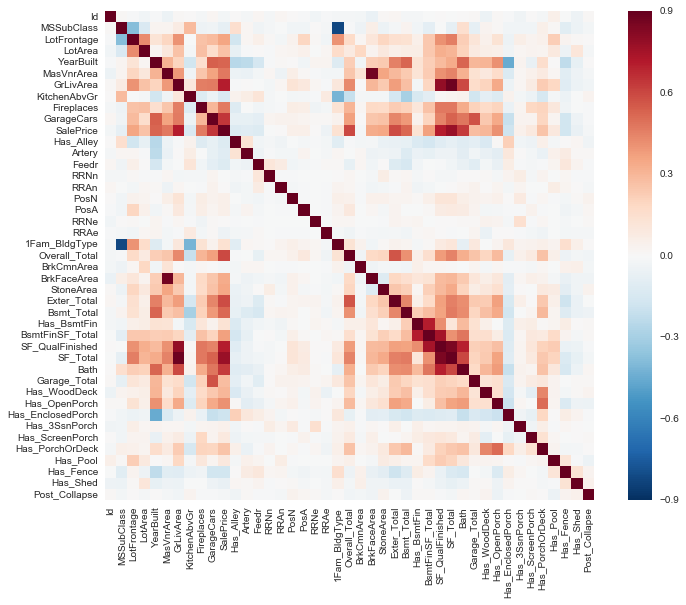

In [3]:
#Do a correlation analysis on the data to look at correlations
traincor = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(traincor, vmax=0.9, square=True)
plt.show()

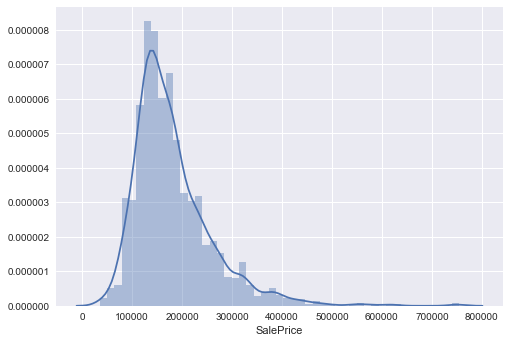

In [4]:
#Perform some EDA to look at the data
#Plot sales price by the count of sale price
g = sns.distplot(df_train['SalePrice'])
plt.show()

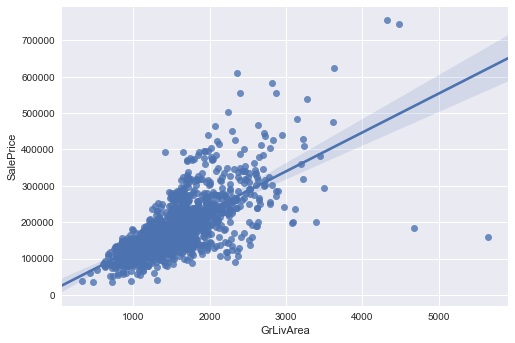

In [5]:
#Ground living area, as we see the higher the living area, the higher the saleprice
GrLivArea_box = sns.regplot(x='GrLivArea', y='SalePrice', data=df_train)
plt.show()

## Looking at Missing Data

In [6]:
#Looking of Missing Value in train
df_train_NA = df_train.isnull()
df_train_nan = df_train_NA[df_train_NA == 1].count()
#Drop all columns that have no missing value 
df_NaN = df_train_nan[df_train_nan > 0]
df_NaN

LotFrontage     259
MasVnrArea        8
BsmtExposure     38
dtype: int64

## Dealing with missing data

In [7]:
#Dropping all variables that have more than 50% missing
df_train = df_train.drop(['LotFrontage','MasVnrArea','BsmtExposure'], axis=1)

In [8]:
# # Dropping variables that is not relevent to buying or is already represented by another variable
# #Drop all variables that doesn't means anything for home buying
# #Dropp 1st and 2ndflr sf, which both equals to grlivarea

# df_train = df_train.drop(['1stFlrSF','2ndFlrSF'], axis =1)

# # Drop all garage and keep only garageQual and garageArea
# df_train = df_train.drop(['GarageYrBlt','GarageType','GarageFinish', 'GarageCond', 'GarageCars'],axis=1)
# df_train['GarageQual'] = df_train['GarageQual'].fillna('None')

# # Impute the LotFrontage with median by nieghborhood
# df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# #Fill fireplace with None for nan values
# df_train['FireplaceQu'] = df_train["FireplaceQu"].fillna("None")

# #Dropping all basement except from bsmtQual and fill it with None 
# df_train = df_train.drop(['BsmtFinType1','BsmtFinType2','BsmtExposure', 'BsmtCond'],axis=1)
# df_train['BsmtQual'] = df_train['BsmtQual'].fillna('None')

# #Dealing with MasVnrType and Area drop it for now, doesn't seem too interesting of a variable as prediction
# df_train = df_train.drop(['MasVnrType','MasVnrArea'],axis=1)

# #Electrical 
# df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [9]:
# Looking at the missing data again to check non are left
#Looking of Missing Value in train
df_train_NA = df_train.isnull()
df_train_nan = df_train_NA[df_train_NA == 1].count()
#Drop all columns that have no missing value 
df_NaN = df_train_nan[df_train_nan > 0]
df_NaN

Series([], dtype: int64)

## Dealing with outliers 

In [10]:
# Deleting two points that are clearing outliers from grlivarea and garageare
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [11]:
# #Dropping the data points where garage area is greater than 1300
# df_train = df_train.drop(df_train[df_train['GarageArea'] > 1300].index)

## Getting dummy variables

In [13]:
# Create Dummies for the rest of the categorical variables
df_train = pd.get_dummies(df_train)
df_train.shape

(1458, 124)

# Modeling

In [14]:
# Creating X and Y 
y = df_train['SalePrice']
x = df_train.loc[:, df_train.columns != 'SalePrice']

In [15]:
# Import modules for modeliing
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, Ridge
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel, f_regression, RFE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

## Feature Selection

In [31]:
# Using RFE perform feature selection on the dataset
# feature extraction
# Input number of feature to be selected in the RFE(model, N_features)
model = Lasso(alpha =4 ,random_state=5)
rfe = RFE(model, 15)
fit = rfe.fit(x, y)
print(fit.n_features_)
fit1 = fit.support_
print(fit.ranking_)

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

15
[ 91  81  90  70  85  28  14   4  47  15  37  96  74  61  10  27   6   3
  26  86  83  73  66  52  55  82  76  79   1  62  36  32  49  38  34  33
   1  39  69  56   1  35 105  95  25  29  93 101   8  17   7 106  68 103
  48  44  41  89   1  18  13  40  60  19  23  24  20   1   1  88 108  21
  45 100   1  30  80  99  16 102  78  46   5  98  54 104  22  31   1   1
  11  12  87   9  42  67  43 107  59  51  58  50  92   1  64  63  84  53
   1  77  57 109   1  71   1  97   2  65  75   1  72  94   1]


In [32]:
#Feature column name and if the column is selected or not; True or False on variable. Zip the dictionary up
feature_list = dict(zip(x.columns, fit1))

In [33]:
#Def function to iterate each key and print out matching input value
def find_key(input_dict, value):
    return {k for k, v in input_dict.items() if v == value}

In [34]:
#Looking into feature_list and select all thats true, Top Feature selected
top_features = find_key(feature_list, True)
features = list(top_features)

In [35]:
#Recreate new feature list call x_new and use that to predict all models 
x_new = df_train[features]
#Check shape to ensure it is only using the new x
x_new.shape

(1458, 15)

## Creating Baseline Models

In [36]:
#Question does data need to be split here to train and test? If so, the data will not be enough to predict all y and only half of y
#Train_test_split our data
# X_train, X_test, y_train, y_test = train_test_split(x_new,y, test_size= 0.3, random_state =10)

In [37]:
#Ridge regression
ridge = Ridge(normalize=True)
ridge.fit(x_new,y)
y_ridge_pred = ridge.predict(x_new)
ridge.score(x_new,y)

0.58598753771238821

In [38]:
# Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =.4 ,random_state=4))
lass = lasso.fit(x_new,y)
y_las_pred = lasso.predict(x_new)
lasso.score(x_new, y)

0.69226284036814867

In [39]:
# ENEt
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.5, l1_ratio=.9, random_state=3))
ENet.fit(x_new, y)
y_ENet_pred = ENet.predict(x_new)
ENet.score(x_new, y)

0.60733648075153535

In [40]:
#GBoost Model
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4, max_features='sqrt',min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
GBoost.fit(x_new, y)
y_GB_pred = GBoost.predict(x_new)
GBoost.score(x_new,y)

0.71466747772656858

In [41]:
#XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, reg_lambda=0.8571,subsample=0.5213, silent=1, random_state =7, nthread = -1)
model_xgb.fit(x_new, y)
y_xgb_pred = model_xgb.predict(x_new)
model_xgb.score(x_new, y)

0.74188179539016286

## Combing models together

In [42]:
#Stacking the models together by using the y_pred of each model as new x and predict on y
# x_model = [y_ridge_pred,y_las_pred, y_ENet_pred, y_GB_pred,y_xgb_pred], axis=0)
ridge_pred = pd.DataFrame(y_ridge_pred)
las_pred = pd.DataFrame(y_las_pred)
ENet_pred = pd.DataFrame(y_ENet_pred)
GB_pred = pd.DataFrame(y_GB_pred)
xgb_pred = pd.DataFrame(y_xgb_pred)
x_model = pd.concat([ridge_pred,las_pred, ENet_pred, GB_pred,xgb_pred] ,axis=1)
#Renaming columns
x_model.columns = ['ridge_pred','las_pred','ENet_pred','GB_pred','xgb_pred']

In [43]:
#Train_test_split with new x model_x
#Train_test_split new x
X_train, X_test, y_train, y_test = train_test_split(x_model,y, test_size= 0.3, random_state =11)

In [44]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, reg_lambda=0.8571,subsample=0.5213, silent=1, random_state =7, nthread = -1)
model_xgb.fit(X_train, y_train)
y_xgb_pred = model_xgb.predict(X_test)
model_xgb.score(X_test, y_test)

0.658133789909638

In [45]:
#Perform CV on model to see if the prediction is close
cv_results = cross_val_score(model_xgb,x_model,y,cv=5)
print(cv_results)
np.mean(cv_results)

[ 0.65183772  0.65289603  0.7111568   0.64821226  0.70594539]


0.67400964102694849

## Prediction score
- on XGBoost model, the model prediction score is 0.65 R^2 
    - With CV the score is about .67 R^2
- This is with 15 predictors, Next we will see if another preprocessing with work better
- If the feature selection, selects 25 predictors, the score goes up to .83 R^2